In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
dff=pd.read_csv('Classified Data')

In [7]:
dff.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [8]:
df=pd.read_csv('Classified Data',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [9]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [10]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [11]:
# no null values (isnull)
#no strings (get_dummies)
#no missing values(no drop)


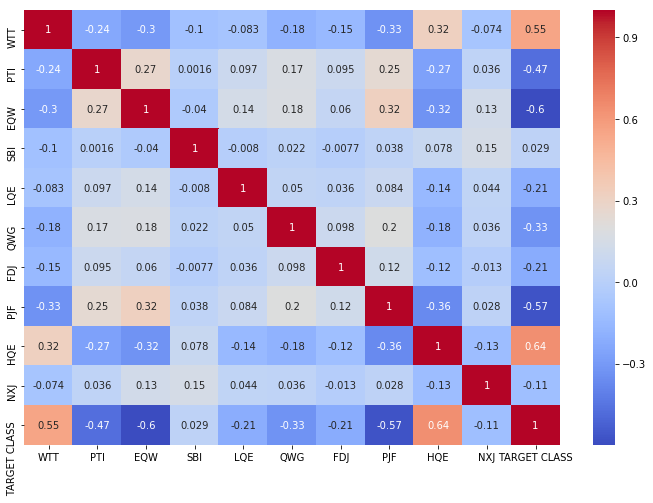

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True,cmap='coolwarm' )

In [25]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [26]:
# we apply standard scaler so that all the values in 
#columns come to same measurable quantity like ( cm, m , km )
# all gets converted to same unit

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()

In [29]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [24]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [30]:
df1=pd.DataFrame(scaled_features, columns=df.columns[:-1])
df1.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [31]:
y=df['TARGET CLASS']
y.head()

0    1
1    0
2    0
3    1
4    1
Name: TARGET CLASS, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test=train_test_split(scaled_features,y,test_size=0.3)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [46]:
ypred=knn.predict(X_test)
ypred

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1], d

In [47]:
y_test

391    1
844    1
363    1
597    0
934    1
595    1
124    0
869    0
531    1
311    0
630    0
193    1
677    1
476    0
217    0
909    0
394    1
465    1
734    0
15     1
523    1
199    0
294    1
132    0
622    1
912    0
188    1
87     1
513    1
493    0
      ..
699    1
402    0
923    1
876    0
650    1
761    1
785    1
986    0
251    1
234    1
688    1
592    0
619    1
879    1
745    1
1      0
139    0
852    1
22     0
484    0
963    1
183    1
268    0
584    1
509    0
71     0
223    1
245    0
172    0
325    1
Name: TARGET CLASS, Length: 300, dtype: int64

In [48]:
np.mean(ypred==y_test)

0.92

In [49]:
np.mean(ypred!=y_test)

0.08

In [50]:
# no we will go for elbow method to find the value of k by plotting a graph between error rate and range, the stable portion of plotting will determine the k value

In [53]:
error_rate=[]
for i in range(1,71):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    ypred=knn.predict(X_test)
    error_rate.append(np.mean(ypred!=y_test))
    print(error_rate)
print(error_rate)

[0.08]
[0.08, 0.07666666666666666]
[0.08, 0.07666666666666666, 0.07666666666666666]
[0.08, 0.07666666666666666, 0.07666666666666666, 0.07333333333333333]
[0.08, 0.07666666666666666, 0.07666666666666666, 0.07333333333333333, 0.07]
[0.08, 0.07666666666666666, 0.07666666666666666, 0.07333333333333333, 0.07, 0.07]
[0.08, 0.07666666666666666, 0.07666666666666666, 0.07333333333333333, 0.07, 0.07, 0.06666666666666667]
[0.08, 0.07666666666666666, 0.07666666666666666, 0.07333333333333333, 0.07, 0.07, 0.06666666666666667, 0.06666666666666667]
[0.08, 0.07666666666666666, 0.07666666666666666, 0.07333333333333333, 0.07, 0.07, 0.06666666666666667, 0.06666666666666667, 0.06333333333333334]
[0.08, 0.07666666666666666, 0.07666666666666666, 0.07333333333333333, 0.07, 0.07, 0.06666666666666667, 0.06666666666666667, 0.06333333333333334, 0.056666666666666664]
[0.08, 0.07666666666666666, 0.07666666666666666, 0.07333333333333333, 0.07, 0.07, 0.06666666666666667, 0.06666666666666667, 0.06333333333333334, 0.05

[0.08, 0.07666666666666666, 0.07666666666666666, 0.07333333333333333, 0.07, 0.07, 0.06666666666666667, 0.06666666666666667, 0.06333333333333334, 0.056666666666666664, 0.056666666666666664, 0.05333333333333334, 0.05, 0.05333333333333334, 0.05333333333333334, 0.05, 0.05, 0.05, 0.05333333333333334, 0.05, 0.05333333333333334, 0.056666666666666664, 0.05333333333333334, 0.056666666666666664, 0.05333333333333334, 0.05333333333333334, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.04666666666666667, 0.05, 0.04666666666666667, 0.05]
[0.08, 0.07666666666666666, 0.07666666666666666, 0.07333333333333333, 0.07, 0.07, 0.06666666666666667, 0.06666666666666667, 0.06333333333333334, 0.056666666666666664, 0.056666666666666664, 0.05333333333333334, 0.05, 0.05333333333333334, 0.05333333333333334, 0.05, 0.05, 0.05, 0.05333333333333334, 0.05, 0.05333333333333334, 0.056666666666666664, 0.05333333333333334, 0.056666666666666664, 0.05333333333333334, 0.05333333333333334, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 

[0.08, 0.07666666666666666, 0.07666666666666666, 0.07333333333333333, 0.07, 0.07, 0.06666666666666667, 0.06666666666666667, 0.06333333333333334, 0.056666666666666664, 0.056666666666666664, 0.05333333333333334, 0.05, 0.05333333333333334, 0.05333333333333334, 0.05, 0.05, 0.05, 0.05333333333333334, 0.05, 0.05333333333333334, 0.056666666666666664, 0.05333333333333334, 0.056666666666666664, 0.05333333333333334, 0.05333333333333334, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.04666666666666667, 0.05, 0.04666666666666667, 0.05, 0.05, 0.05333333333333334, 0.05, 0.05333333333333334, 0.05333333333333334, 0.05, 0.043333333333333335, 0.05, 0.04666666666666667, 0.05, 0.05, 0.05, 0.04666666666666667, 0.05333333333333334, 0.04666666666666667, 0.05, 0.05, 0.05333333333333334, 0.05]
[0.08, 0.07666666666666666, 0.07666666666666666, 0.07333333333333333, 0.07, 0.07, 0.06666666666666667, 0.06666666666666667, 0.06333333333333334, 0.056666666666666664, 0.056666666666666664, 0.05333333333333334, 0.05, 0.05333

[0.08, 0.07666666666666666, 0.07666666666666666, 0.07333333333333333, 0.07, 0.07, 0.06666666666666667, 0.06666666666666667, 0.06333333333333334, 0.056666666666666664, 0.056666666666666664, 0.05333333333333334, 0.05, 0.05333333333333334, 0.05333333333333334, 0.05, 0.05, 0.05, 0.05333333333333334, 0.05, 0.05333333333333334, 0.056666666666666664, 0.05333333333333334, 0.056666666666666664, 0.05333333333333334, 0.05333333333333334, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.04666666666666667, 0.05, 0.04666666666666667, 0.05, 0.05, 0.05333333333333334, 0.05, 0.05333333333333334, 0.05333333333333334, 0.05, 0.043333333333333335, 0.05, 0.04666666666666667, 0.05, 0.05, 0.05, 0.04666666666666667, 0.05333333333333334, 0.04666666666666667, 0.05, 0.05, 0.05333333333333334, 0.05, 0.05, 0.043333333333333335, 0.05333333333333334, 0.05, 0.06, 0.056666666666666664, 0.06, 0.056666666666666664, 0.05333333333333334, 0.056666666666666664, 0.05333333333333334]
[0.08, 0.07666666666666666, 0.07666666666666666,

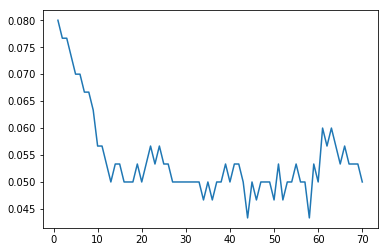

In [66]:
plt.plot(range(1,71),error_rate)

Text(0,0.5,'Error rate')

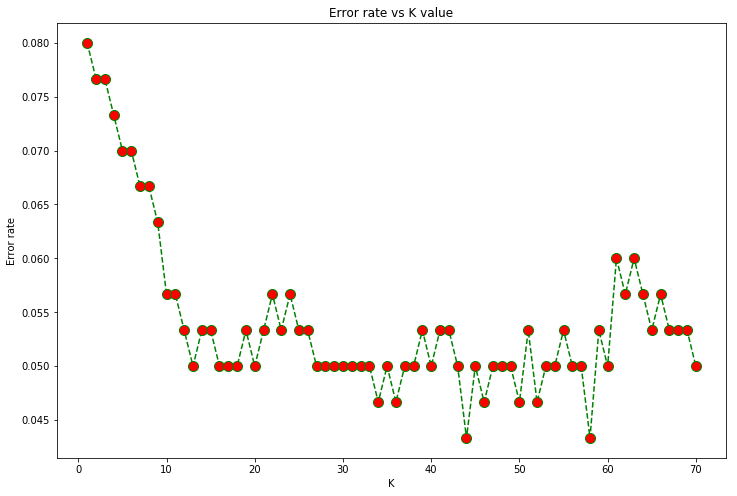

In [71]:
plt.figure(figsize=(12,8))
plt.plot(range(1,71),error_rate,color='green',linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('K')
plt.ylabel('Error rate')

In [1]:
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=26')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

NameError: name 'KNeighborsClassifier' is not defined

In [59]:
z=confusion_matrix(y_test,ypred)
print(z)

[[145   9]
 [  6 140]]


In [61]:
cr=classification_report(y_test,ypred)

print(cr)

             precision    recall  f1-score   support

          0       0.96      0.94      0.95       154
          1       0.94      0.96      0.95       146

avg / total       0.95      0.95      0.95       300



In [63]:
df=pd.DataFrame(z)
df

,0,1
0,145,9
1,6,140


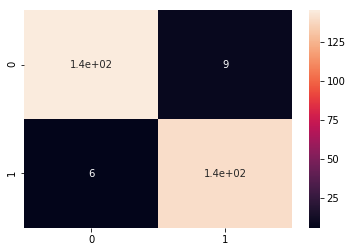

In [65]:
sns.heatmap(df,annot=True)